# CNN UNET new pretrained model with NCEP region masked


In [1]:
import imp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import sys
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

import os
tf.random.set_seed(42)


sys.path.insert(0, '../../src')
from utils import df_to_xarray,read_xarray,inverse_scale_image, get_point_prediction, custom_rmse

sys.path.insert(0, '../../src/preprocess')
from data_preprocess import preprocess_image_reduced,preprocess_images

/burg/glab/users/sk4973/venv/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
2022-04-07 14:46:35.314907: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [13]:
def ncep_mask():
    '''ncep_mask
    This masks out regions in the 
    NCEP land-sea mask (https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html)
    to define the open ocean. Regions removed include:
    - Arctic ocean : defined as North of 79N
    - Hudson Bay
    - caspian sea, black sea, mediterranean sea, baltic sea, Java sea, Red sea
    '''
    mask = np.ones((180, 360))
    lat = np.arange(180)
    lon = np.arange(360)

    
    ### remove arctic
    mask[lat>79] = 0
    mask[((lat>67) & (lat<80))][((lon>20) & (lon<180))] = 0
    mask[(lat>67) & (lat<80)][(lon>180) & (lon<260)] = 0
    
    plt.imshow(mask)
    
#     ### remove caspian sea, black sea, mediterranean sea, and baltic sea
    
#     data = data.where(~((lat>24) & (lat<70) & (lon>14) & (lon<70)))
    
#     ### remove hudson bay
#     data = data.where(~((lat>50) & (lat<70) & (lon>-100+360) & (lon<-70+360)))
#     data = data.where(~((lat>70) & (lat<80) & (lon>-130+360) & (lon<-80+360)))
    
#     ### Remove Red sea
#     data = data.where(~((lat>10) & (lat<25) & (lon>10) & (lon<45)))
#     data = data.where(~((lat>20) & (lat<50) & (lon>0) & (lon<20)))
    
    return []
a=ncep_mask()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 180 but corresponding boolean dimension is 179

In [26]:
mask = np.ones((180, 360))
lat =np.arange(180)
lon = np.arange(360)


mask[lat>79] = 0
tmp = lat[(67 < lat) & (lat < 80)]
tmp2 = lon[(20 < lon) & (lon < 180)]
tmp3 = np.ix_((tmp,tmp2))

mask[tmp3] = 0
#mask[(lat>67) & (lat<80)][(lon>180) & (lon<260)] = 0
    

/burg/glab/users/sk4973/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


IndexError: arrays used as indices must be of integer (or boolean) type

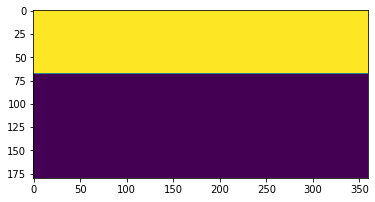

In [20]:
plt.imshow(mask)

In [27]:
print(tmp3)

(array([array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
       array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
               34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
               47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
               60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
               73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
               86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
               99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
              112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
              125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
              138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
              151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
              164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 17